<a href="https://colab.research.google.com/github/JoumanaMaki/Autoencoders-for-image-compression/blob/main/Convolutional_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Autoencoder

## Import Libraries

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
#UpSampling2D to increase te size --> opposite of max pooling
# Reshape is the opposite of Flatten --< vector to matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

##Loading the images

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
y_train[0]

9

In [7]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [4]:
x_train[0].shape

(28, 28)

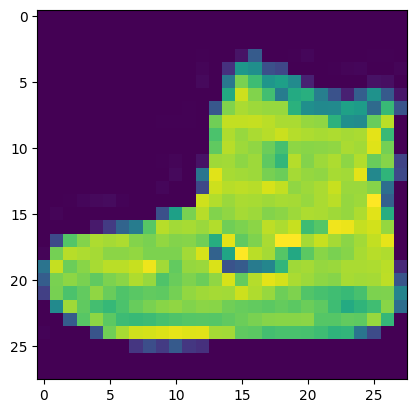

In [5]:
plt.imshow(x_train[0])

## Visualize images

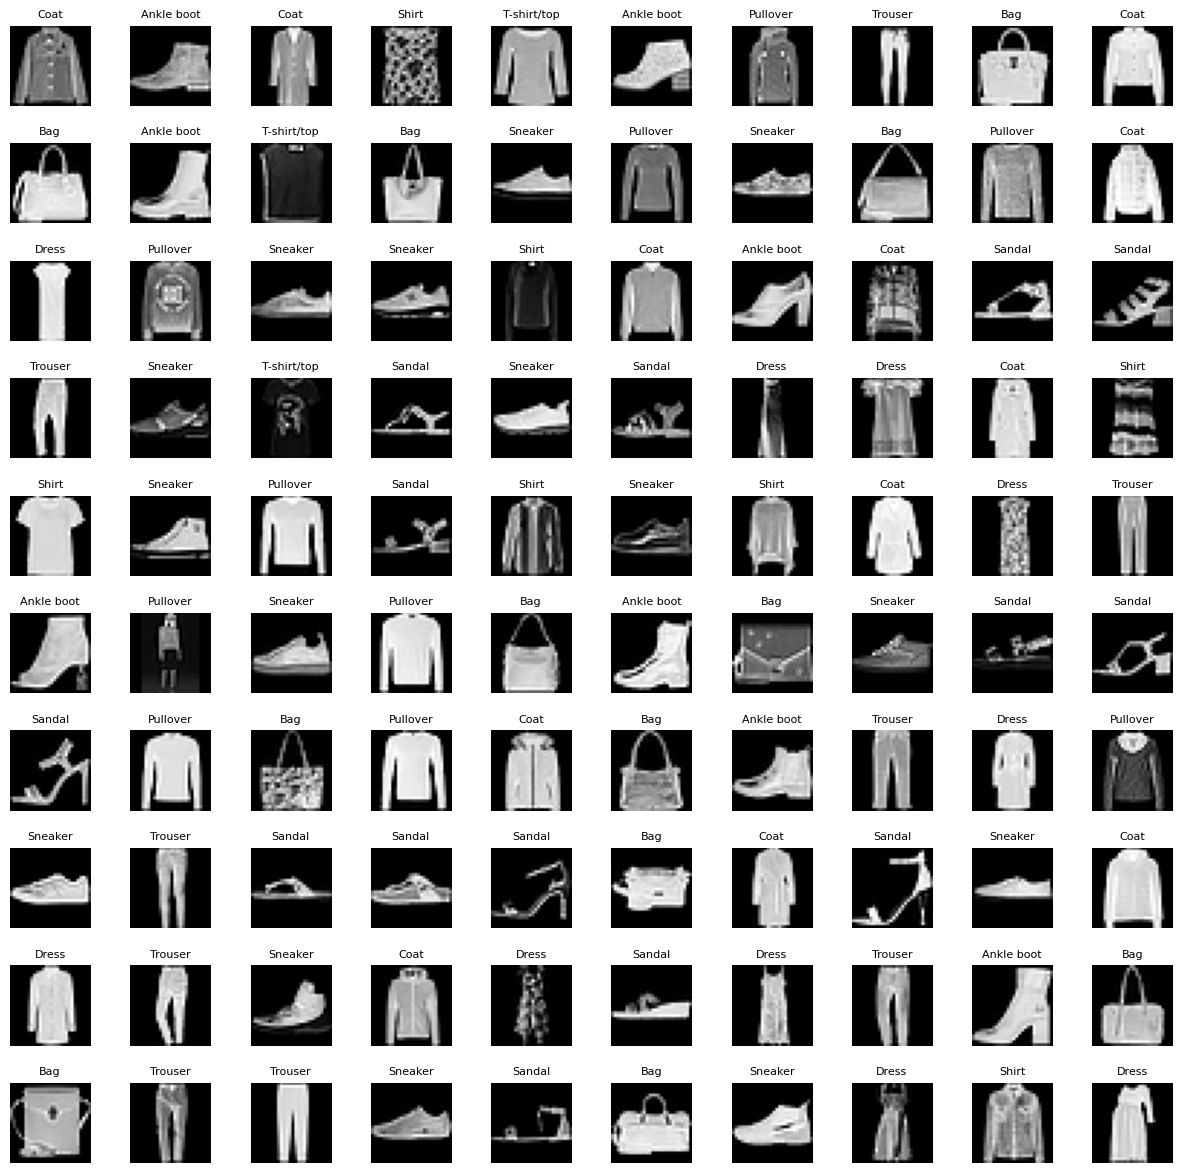

In [9]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
height =10
width =10

fig, axes = plt.subplots(height, width, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, height * width):
  index = np.random.randint(0, x_train.shape[0])
  axes[i].imshow(x_train[index], cmap = 'gray')
  axes[i].set_title(classes[y_train[index]], fontsize=8)
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

## Pre-processing the images

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [15]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Build and train the convolutional autoencoder

In [30]:
autoencoder = Sequential() # sequence of layers



#Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size =(3,3), activation='relu', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

#valid: use some part of the image, same: use all the image
autoencoder.add(Conv2D(filters = 8, kernel_size =(3,3), activation='relu',padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#strides  the amount by which the kernel is shifted when the kernel is passed over the image
autoencoder.add(Conv2D(filters = 8, kernel_size =(3,3), activation='relu',padding='same',strides=(2,2)))

autoencoder.add(Flatten())

# #Decoder
autoencoder.add(Reshape((4,4,8)))
autoencoder.add(Conv2D(filters = 8, kernel_size =(3,3), activation='relu',padding='same'))
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size =(3,3), activation='relu',padding='same'))
autoencoder.add(UpSampling2D((2,2)))


autoencoder.add(Conv2D(filters = 16, kernel_size =(3,3), activation='relu'))
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size =(3,3), activation='sigmoid',padding='same'))
# autoencoder.add
autoencoder.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_9 (Reshape)                  │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_15 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_16 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_17 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Output = (Input- filter +1)/ stride


# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output: (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

26.0

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.4984 - loss: 0.3578
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.5055 - loss: 0.2909
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 58ms/step - accuracy: 0.5061 - loss: 0.2858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 47ms/step - accuracy: 0.5076 - loss: 0.2820
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 42ms/step - accuracy: 0.5064 - loss: 0.2806
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - accuracy: 0.5077 - loss: 0.2781
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.5078 - loss: 0.2773
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 54ms/step - accuracy: 0.5078 - loss: 0.2765
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 56ms/step - accuracy: 0.5076 - loss: 0.2757
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 56ms/step - accuracy: 0.5076 - loss: 0.2755


## Encoding and decoding the test images

In [36]:
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('flatten_13').output)

In [37]:
encoder.summary()

Model: "functional_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 13, 13, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 128)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
coded_test_images = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [39]:
coded_test_images.shape

(10000, 128)

In [40]:
coded_test_images[0]

array([0.52056646, 0.        , 0.14785638, 0.1029864 , 0.1955882 ,
       0.38618824, 0.53400403, 0.48516822, 0.69659734, 0.11665714,
       0.13587017, 0.12980494, 0.25138697, 0.54239595, 0.7088655 ,
       0.78652793, 0.8202562 , 0.2675052 , 0.24396016, 0.        ,
       0.35692078, 0.44816023, 0.8498102 , 0.6025898 , 0.34306726,
       0.28185558, 0.35285497, 0.        , 0.2758787 , 0.06500134,
       0.21947908, 0.3418014 , 0.63739073, 0.25839064, 0.12241851,
       0.41922617, 0.        , 0.481036  , 0.8276791 , 0.49173903,
       0.50783074, 0.24258414, 0.92674464, 0.        , 0.        ,
       0.13105297, 0.19892645, 0.9733142 , 0.82129   , 1.6060307 ,
       2.0079756 , 0.        , 0.        , 0.        , 0.456616  ,
       1.0219562 , 1.0537099 , 1.129535  , 1.4044973 , 0.        ,
       0.5806914 , 0.        , 0.72304446, 0.20515627, 0.57131845,
       1.1109347 , 1.3703536 , 0.04595977, 0.        , 0.        ,
       0.6352991 , 1.2249119 , 1.1256539 , 1.9714239 , 2.01026

In [42]:
decoded_test_images = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [43]:
decoded_test_images.shape

(10000, 28, 28, 1)

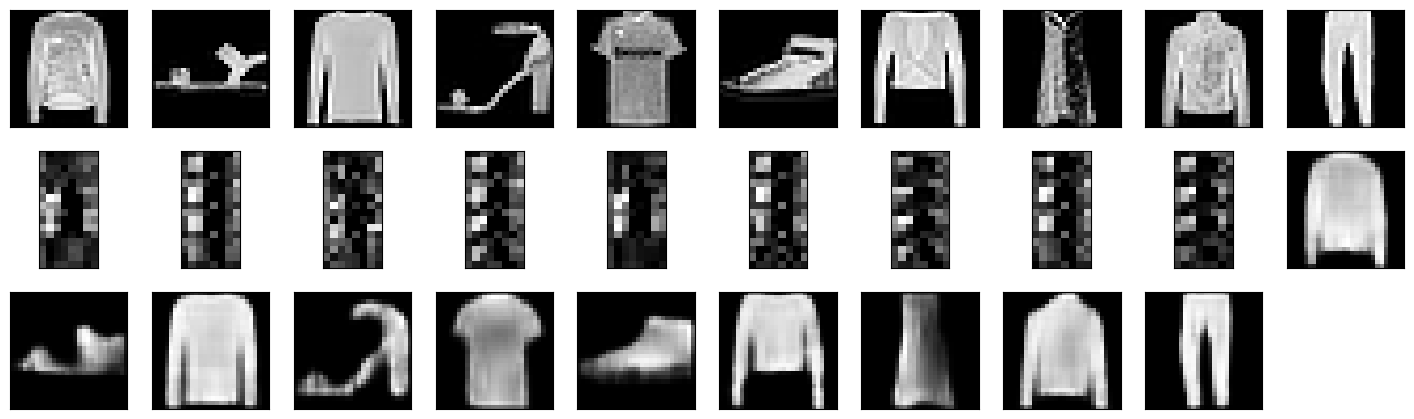

In [45]:
num_images = 10
test_images = np.random.randint(0, x_test.shape[0]-1, size=num_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #original images
  ax = plt.subplot(10,10,  i+1)
  plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks([])
  plt.yticks([])

  #encoded images
  ax = plt.subplot(10,10,  i+num_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
  plt.xticks([])
  plt.yticks([])

  #decoded images
  ax = plt.subplot(10,10,  i+num_images*2)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks([])
  plt.yticks([])
